# Seismic Event Forecasting Model
**Name:** Anwer Sadath 

**Organization:** Entri Elevate

**Date:** 11/08/2024

###  Overview of Problem Statement:

Earthquakes are among the most devastating natural disasters, causing significant loss of life, property damage, and economic disruption. Accurate prediction of seismic events is crucial for disaster preparedness and mitigation. However, due to the complex and unpredictable nature of geological processes, forecasting earthquakes poses a significant challenge. This project aims to analyze a global dataset of recorded earthquakes to uncover patterns and insights that could contribute to more accurate seismic predictions.

###  Objective:

The primary objective of this project is to develop a machine learning model capable of analyzing seismic data and predicting earthquake occurrences based on various geological and environmental factors. This model aims to improve our understanding of seismic activities and aid in early warning systems.

###  Data Description:

- **Source:** The dataset used in this project is sourced from Kaggle, specifically from the repository available at [Kaggle Earthquake Dataset](https://www.kaggle.com/datasets/warcoder/earthquake-dataset).
- **Dataset Name:** `Global_Earthquake_Data.csv`
- **Dataset Overview:** The dataset comprises a wide range of features related to earthquakes, including their magnitude, location, time of occurrence, and other relevant factors. This data will be used to explore patterns and build predictive models for seismic events.



###  Features:

- **title:** The title assigned to the earthquake event.
- **magnitude:** The magnitude of the earthquake, which serves as the target variable for prediction.
- **date_time:** The date and time when the earthquake occurred.
- **cdi:** The maximum reported intensity for the event, indicating the level of shaking felt by people.
- **mmi:** The maximum estimated instrumental intensity for the event, based on recorded data.
- **alert:** The alert level associated with the earthquake, categorized as "green," "yellow," "orange," or "red."
- **tsunami:** A binary indicator where "1" represents an event in oceanic regions (potential tsunami) and "0" otherwise.
- **sig:** A numerical value that describes the significance of the earthquake, considering factors like magnitude and population exposure.
- **net:** The identifier for the network or organization that contributed the data.
- **nst:** The total number of seismic stations used to determine the earthquake's location.
- **dmin:** The horizontal distance from the earthquake's epicenter to the nearest seismic station.
- **gap:** The largest azimuthal gap between adjacent seismic stations, measured in degrees.
- **magType:** The method or algorithm used to calculate the preferred magnitude for the event.
- **depth:** The depth at which the earthquake rupture begins, measured in kilometers.
- **latitude / longitude:** The geographic coordinates of the earthquake's epicenter.
- **location:** The specific location within the affected country where the earthquake occurred.
- **continent:** The continent where the earthquake-hit country is located.
- **country:** The country affected by the earthquake.


### DATA COLLECTION

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from category_encoders import TargetEncoder

In [2]:
# Load the data
df= pd.read_csv('earthquake_data.csv')

In [3]:
df.shape

(782, 19)

In [4]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [6]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

In [7]:
#Unique values in 'alert' column
df['alert'].unique()

array(['green', 'yellow', 'orange', 'red', nan], dtype=object)

In [8]:
#Unique values in 'continent' column
df['continent'].unique()

array(['Oceania', nan, 'North America', 'Asia', 'South America', 'Europe',
       'Africa'], dtype=object)

### DATA CLEANING

#### Handling Missing Values

In [9]:
# Check for missing values
df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

In [10]:
# Count the number of duplicate rows in the DataFrame
df.duplicated().sum()

0

In [11]:
# Separate numerical and categorical columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
# Define imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [14]:
# Apply imputers
df[num_columns] = num_imputer.fit_transform(df[num_columns])
df[cat_columns] = cat_imputer.fit_transform(df[cat_columns])

In [15]:
# Check for missing values
df.isnull().sum()

title        0
magnitude    0
date_time    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
location     0
continent    0
country      0
dtype: int64

In [16]:
# Drop rows with null values
df.dropna(inplace=True)

In [17]:
# Number of rows
len(df)

782

#### Remove Outliers

In [18]:
#Check for and handle outliers using statistical methods.

In [19]:
from scipy.stats import mstats

In [20]:
# Capping method: Cap the values outside the 5th and 95th percentiles
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower_bound, upper_bound)

# Apply the capping method to each numeric column in the DataFrame
for col in df.select_dtypes(include=["int", "float"]).columns:
    df[col] = cap_outliers(df[col])

# Print the first few rows of the modified DataFrame
print(df.head())

                                          title  magnitude         date_time  \
0  M 7.0 - 18 km SW of Malango, Solomon Islands        7.0  22-11-2022 02:03   
1      M 6.9 - 204 km SW of Bengkulu, Indonesia        6.9  18-11-2022 13:37   
2                                      M 7.0 -         7.0  12-11-2022 07:09   
3           M 7.3 - 205 km ESE of Neiafu, Tonga        7.3  11-11-2022 10:48   
4                                      M 6.6 -         6.6  09-11-2022 10:14   

   cdi  mmi  alert  tsunami    sig net    nst   dmin   gap magType  depth  \
0  8.0  7.0  green      1.0  768.0  us  117.0  0.509  17.0     mww   14.0   
1  4.0  4.0  green      0.0  735.0  us   99.0  2.229  34.0     mww   25.0   
2  3.0  3.0  green      1.0  755.0  us  147.0  3.125  18.0     mww  526.9   
3  5.0  5.0  green      1.0  833.0  us  149.0  1.865  21.0     mww   37.0   
4  0.0  3.0  green      1.0  670.0  us  131.0  4.998  27.0     mww  526.9   

   latitude  longitude                   location contin

In [21]:
len(df)

782

#### Address Skewed Data

In [22]:
# Address skewed data in numerical features through transformations

In [23]:
# Visualize the transformed distributions 
import matplotlib.pyplot as plt
import seaborn as sns

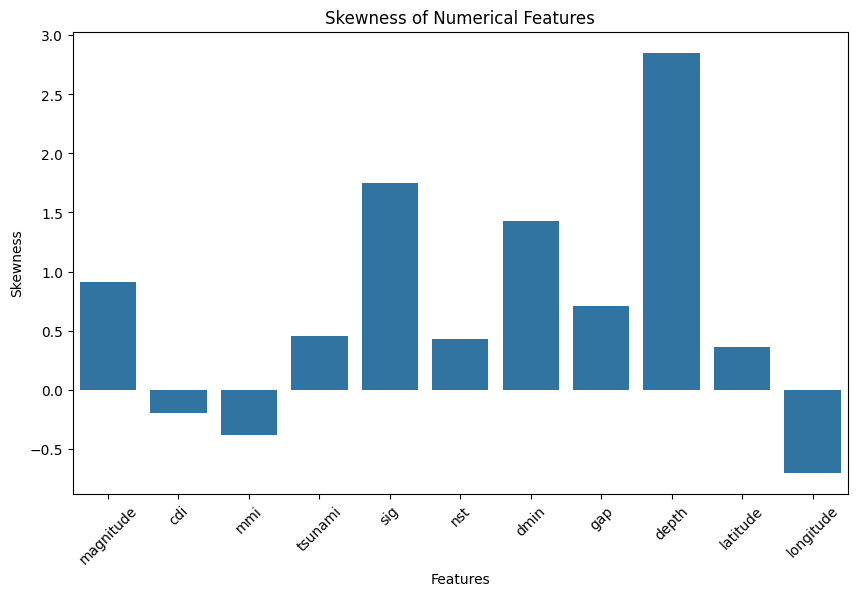

Skewed Features:
Index(['magnitude', 'sig', 'dmin', 'gap', 'depth'], dtype='object')


In [24]:
# Select numerical features
numerical_features = df.select_dtypes(include=[np.number])

# Calculate skewness for each numerical feature
skewness = numerical_features.apply(lambda x: x.skew())

# Visualize skewness
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness)
plt.title('Skewness of Numerical Features')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.show()

# Identify features with skewness greater than a threshold (e.g., 0.5)
skewed_features = skewness[skewness > 0.5].index
print("Skewed Features:")
print(skewed_features)

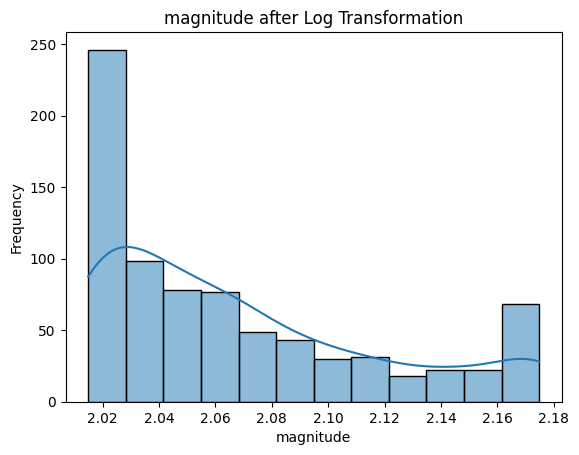

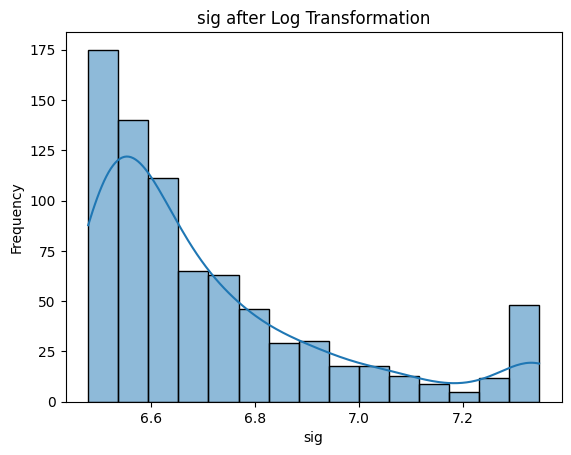

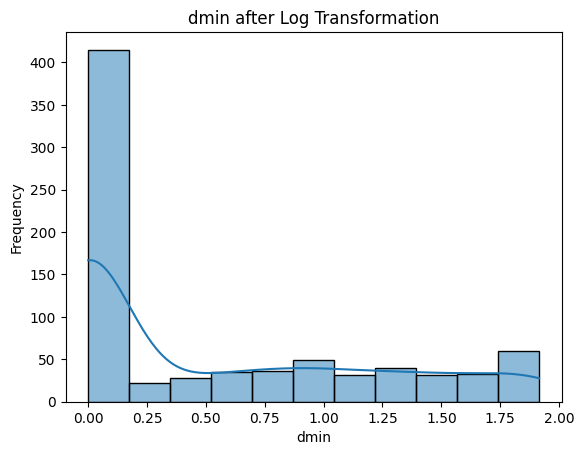

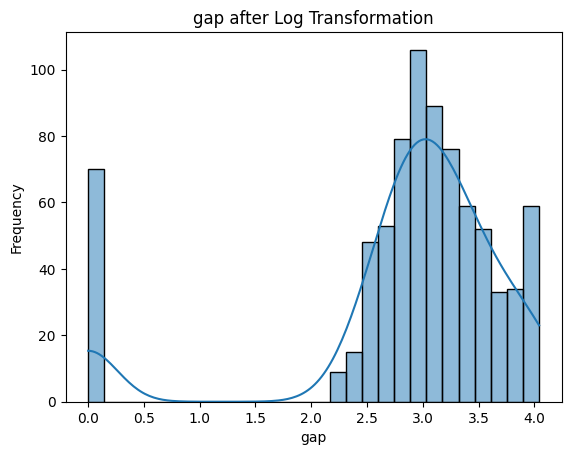

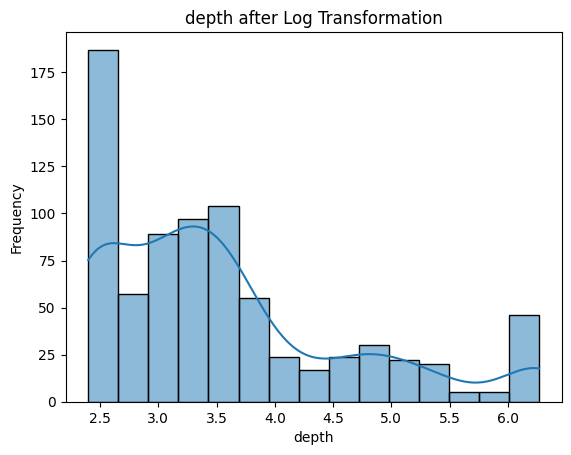

In [25]:
# Apply log transformation to each skewed feature
for feature in skewed_features:
    df[feature] = np.log1p(df[feature])  # Using log1p to handle zero values

for feature in skewed_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} after Log Transformation')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Exploratory Data Analysis (EDA)


In [26]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    float64
 4   mmi        782 non-null    float64
 5   alert      782 non-null    object 
 6   tsunami    782 non-null    float64
 7   sig        782 non-null    float64
 8   net        782 non-null    object 
 9   nst        782 non-null    float64
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   782 non-null    object 
 17  continent  782 non-null    object 
 18  country    782 non-null    object 
dtypes: float64(11), object(8)
memory usage: 116.2+ KB


In [27]:
# Display the first few rows of the DataFrame
print(df.head())

                                          title  magnitude         date_time  \
0  M 7.0 - 18 km SW of Malango, Solomon Islands   2.079442  22-11-2022 02:03   
1      M 6.9 - 204 km SW of Bengkulu, Indonesia   2.066863  18-11-2022 13:37   
2                                      M 7.0 -    2.079442  12-11-2022 07:09   
3           M 7.3 - 205 km ESE of Neiafu, Tonga   2.116256  11-11-2022 10:48   
4                                      M 6.6 -    2.028148  09-11-2022 10:14   

   cdi  mmi  alert  tsunami       sig net    nst      dmin       gap magType  \
0  8.0  7.0  green      1.0  6.645091  us  117.0  0.411447  2.890372     mww   
1  4.0  4.0  green      0.0  6.601230  us   99.0  1.172172  3.555348     mww   
2  3.0  3.0  green      1.0  6.628041  us  147.0  1.417066  2.944439     mww   
3  5.0  5.0  green      1.0  6.726233  us  149.0  1.052568  3.091042     mww   
4  0.0  3.0  green      1.0  6.508769  us  131.0  1.791426  3.332205     mww   

      depth  latitude  longitude      

In [28]:
# Summary statistics of numerical columns
print(df.describe())

        magnitude         cdi         mmi     tsunami         sig         nst  \
count  782.000000  782.000000  782.000000  782.000000  782.000000  782.000000   
mean     2.068540    4.333760    5.936061    0.388747    6.713467  226.583120   
std      0.048687    3.169939    1.378824    0.487778    0.240778  242.650674   
min      2.014903    0.000000    3.000000    0.000000    6.478510    0.000000   
25%      2.028148    0.000000    5.000000    0.000000    6.539586    0.000000   
50%      2.054124    5.000000    6.000000    0.000000    6.626718  140.000000   
75%      2.091864    7.000000    7.000000    1.000000    6.814268  445.000000   
max      2.174752    9.000000    8.000000    1.000000    7.347106  663.950000   

             dmin         gap       depth    latitude   longitude  
count  782.000000  782.000000  782.000000  782.000000  782.000000  
mean     0.535952    2.873832    3.550141    3.935196   52.511144  
std      0.665034    0.996373    1.068984   25.716669  117.361574 

#### Data Visualisation

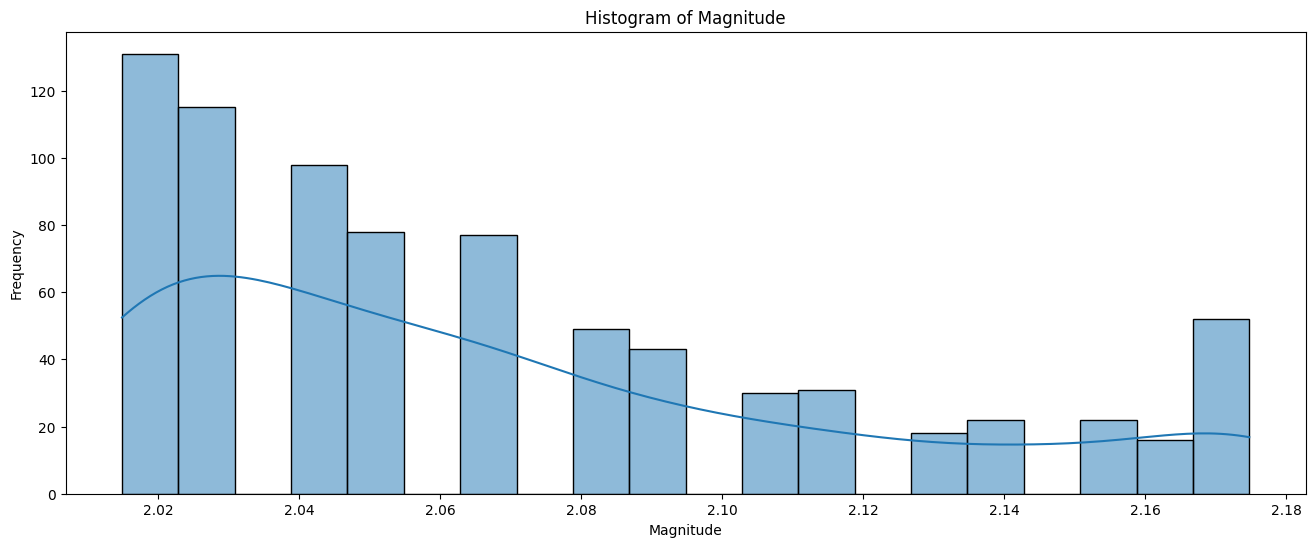

In [29]:
#Understanding the distribution of earthquake magnitudes
plt.figure(figsize=(16, 6))
sns.histplot(df['magnitude'], bins=20, kde=True)
plt.title('Histogram of Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

###### Magnitude Distribution: The histogram of earthquake magnitudes shows that most earthquakes in the dataset have magnitudes between 2 and 2.18.

C:\Users\user\AppData\Local\Temp\ipykernel_8864\1708639529.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


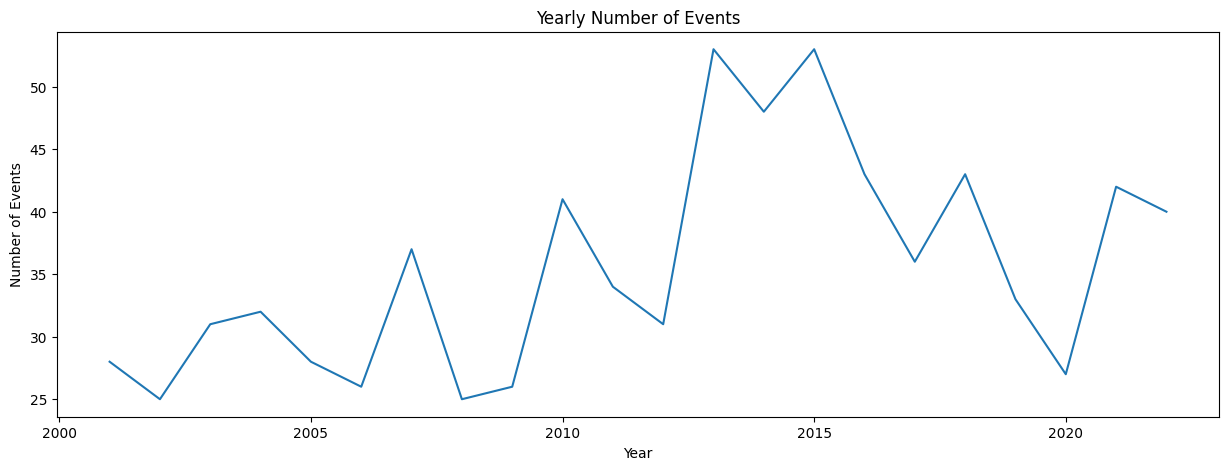

In [30]:
# Time series analysis
# Temporal analysis
df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = df['date_time'].dt.year

# Plot time series for number of events per year
plt.figure(figsize=(15, 5))
df['year'].value_counts().sort_index().plot()
plt.title('Yearly Number of Events')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

###### Increasing Trend: There is a noticeable increase in the number of recorded seismic events over the years, particularly from 2013 onwards. This trend suggests a rise in seismic activity or improvements in detection technology.


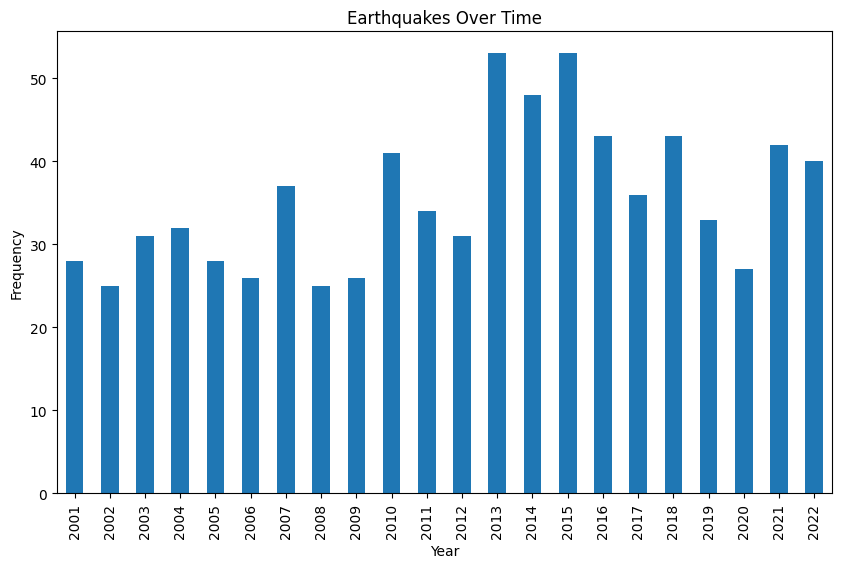

In [31]:

df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = df['date_time'].dt.year

plt.figure(figsize=(10, 6))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Earthquakes Over Time")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

# Drop the 'year' column
df.drop(columns=['year'], inplace=True)

##### The temporal analysis reveals interesting trends in earthquake frequency over the years. In particular: The years 2013 and 2015 stands out as having the highest frequency of earthquakes in the dataset,the years 2020 and 2002 exhibit the lowest frequency of earthquake

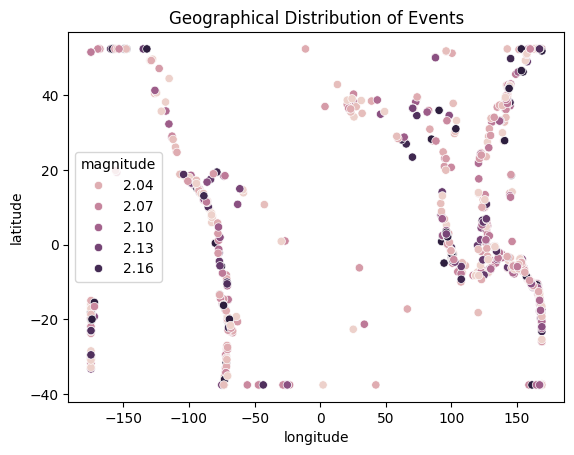

In [32]:
# Scatter plot for latitude vs longitude
sns.scatterplot(x='longitude', y='latitude', hue='magnitude', data=df)
plt.title('Geographical Distribution of Events')
plt.show()

##### Earthquakes are distributed across different regions, as indicated by the scatter plot of latitude and longitude coordinates. Some areas may have a higher frequency of earthquakes compared to others.

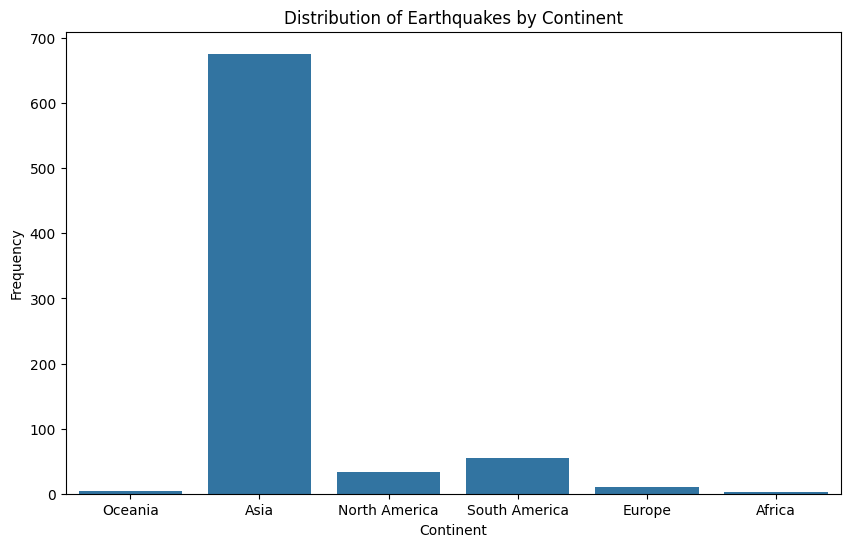

In [33]:
# Continent and Country Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='continent')
plt.title("Distribution of Earthquakes by Continent")
plt.xlabel("Continent")
plt.ylabel("Frequency")
plt.show()

##### Asia is the continent most affected by earthquakes

In [34]:
# Create a GeoDataFrame
import geopandas as gpd

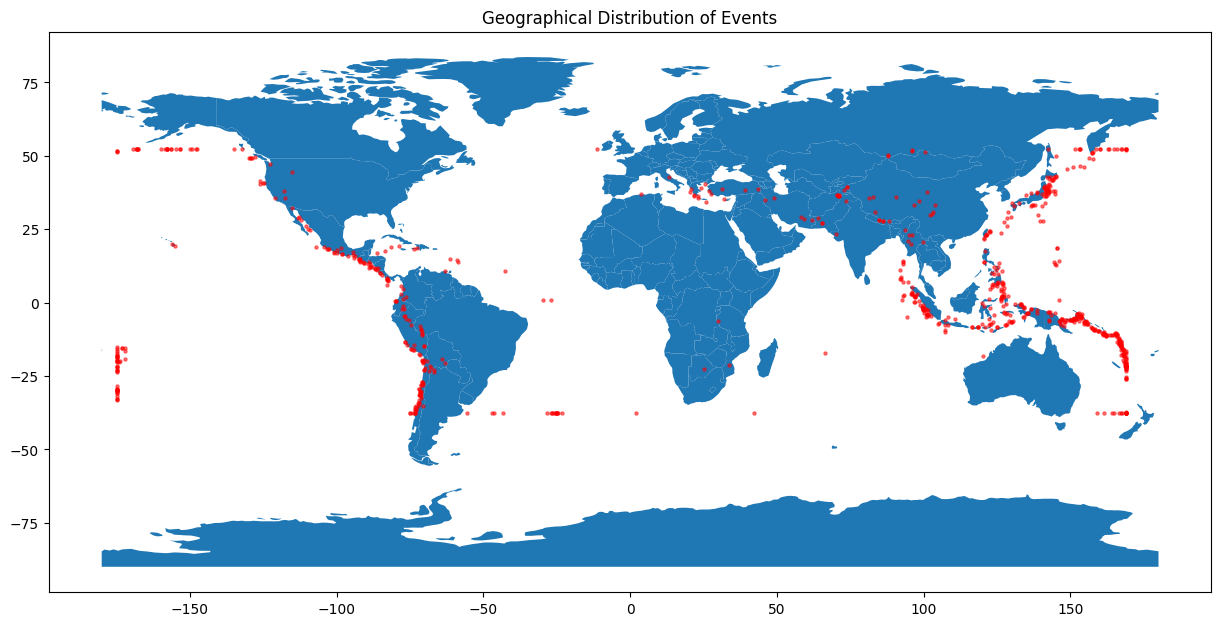

In [35]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
#remove warnings
import warnings
warnings.filterwarnings("ignore")
# Plot the geographical distribution
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10))
gdf.plot(ax=ax, color='red', markersize=5, alpha=0.5)
plt.title('Geographical Distribution of Events')
plt.show()

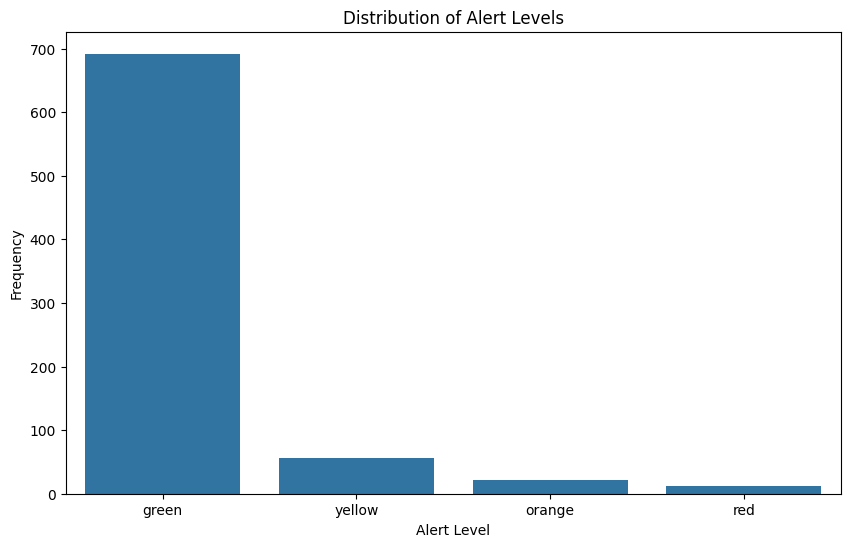

In [36]:
# Impact analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='alert', order=['green', 'yellow', 'orange', 'red'])
plt.title("Distribution of Alert Levels")
plt.xlabel("Alert Level")
plt.ylabel("Frequency")
plt.show()

##### Impact Analysis: Most earthquakes in the dataset have a "green" alert level, indicating low impact.

In [37]:
#To identify relationships between numerical features.

In [38]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

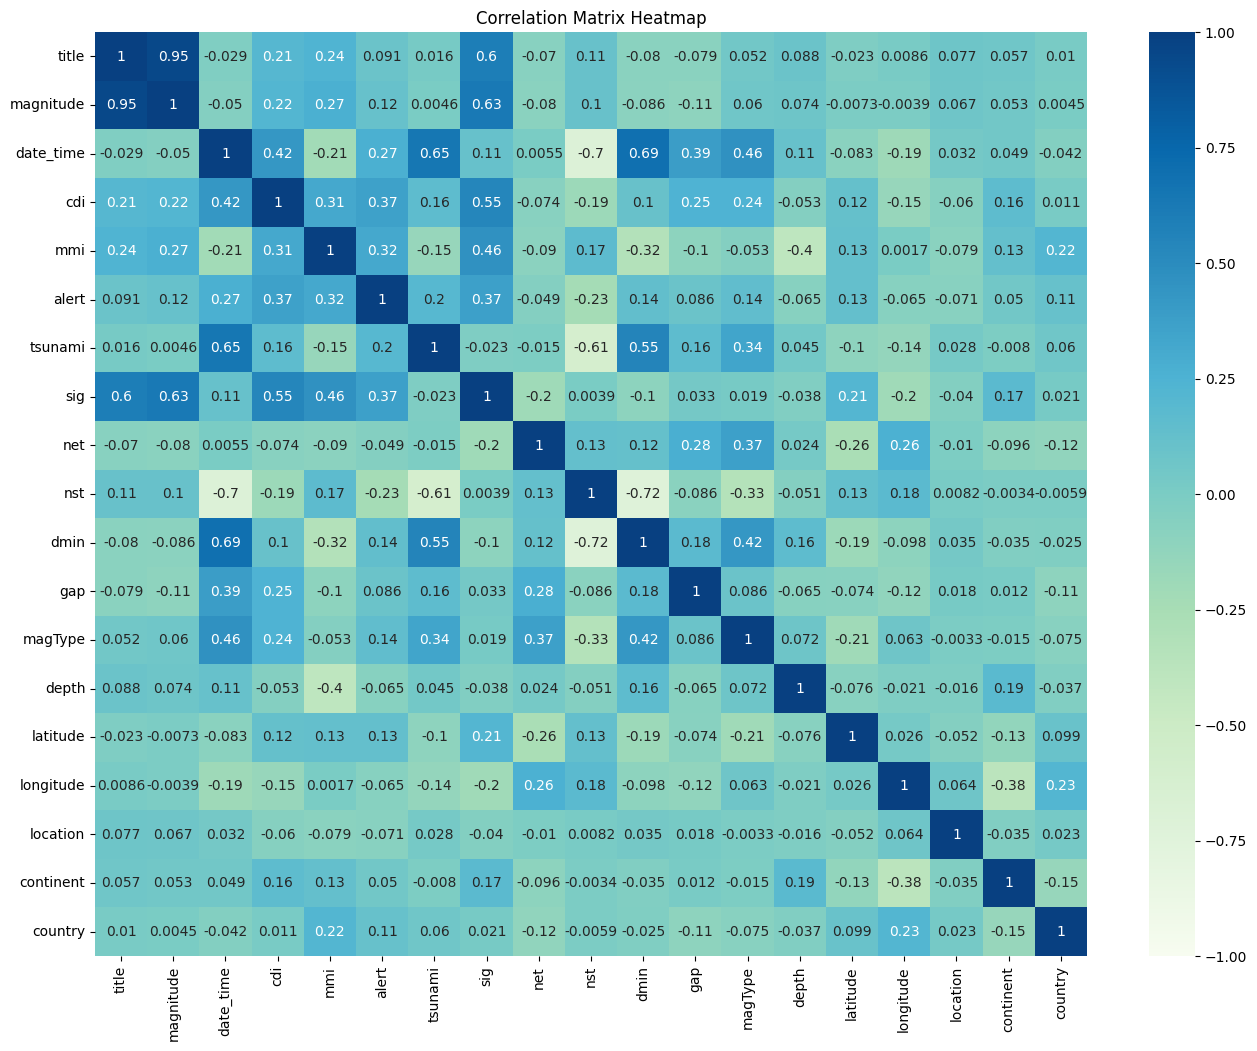

Highly Correlated Pairs (correlation > 0.8 or < -0.8):
('magnitude', 'title', 0.9508730137534204)


In [39]:
# Identify and encode categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Identify highly correlated pairs
threshold = 0.8
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname1, colname2, correlation_matrix.iloc[i, j]))

# Print highly correlated pairs
print("Highly Correlated Pairs (correlation > 0.8 or < -0.8):")
for pair in highly_correlated_pairs:
    print(pair)

# Convert encoded columns back to original labels
for col in categorical_columns:
    df[col] = label_encoders[col].inverse_transform(df[col])

##### Correlation Analysis: The correlation heatmap shows correlations between numerical features.'locationSource' and 'net' are highly correlated.

In [40]:
df = df.drop(columns=['title']) # Dropping the 'title' column because it is highly correlated with 'magnitude' (correlation = 0.8735)

## Feature Engineering

In [41]:
df.columns

Index(['magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami', 'sig',
       'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

In [42]:
# One-hot encoding for 'alert' and 'magType'
df= pd.get_dummies(df, columns=['alert', 'magType','net','continent'], drop_first=False)

# Target encoding for 'country', 'location', and 'continent'
encoder = TargetEncoder(cols=['country', 'location'])
df[['country_encoded', 'location_encoded']] = encoder.fit_transform(df[['country', 'location']], df['magnitude'])

# Drop original categorical columns
df.drop(['country', 'location'], axis=1, inplace=True)

# Optionally drop 'date_time' and 'net'
df.drop(['date_time'], axis=1, inplace=True)

# Verify the encoded DataFrame
print(df.head())

   magnitude  cdi  mmi  tsunami       sig    nst      dmin       gap  \
0   2.079442  8.0  7.0      1.0  6.645091  117.0  0.411447  2.890372   
1   2.066863  4.0  4.0      0.0  6.601230   99.0  1.172172  3.555348   
2   2.079442  3.0  3.0      1.0  6.628041  147.0  1.417066  2.944439   
3   2.116256  5.0  5.0      1.0  6.726233  149.0  1.052568  3.091042   
4   2.028148  0.0  3.0      1.0  6.508769  131.0  1.791426  3.332205   

      depth  latitude  ...  net_us  net_uw  continent_Africa  continent_Asia  \
0  2.708050   -9.7963  ...    True   False             False           False   
1  3.258097   -4.9559  ...    True   False             False            True   
2  6.268907  -20.0508  ...    True   False             False           False   
3  3.637586  -19.2918  ...    True   False             False            True   
4  6.268907  -25.5948  ...    True   False             False            True   

   continent_Europe  continent_North America  continent_Oceania  \
0             False

In [43]:
# Split features and target variable
X = df.drop(columns=['magnitude'])
y = df['magnitude']

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **FEATURE SELECTION:**


In [45]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Initialize SelectKBest with mutual_info_regression as the scoring function
k_best_selector = SelectKBest(score_func=mutual_info_regression, k=5)

# Fit the selector on the training data
X_train_selected = k_best_selector.fit_transform(X_train, y_train)

# Print the selected features
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features:", selected_features)

# Transform the test data using the same selector
X_test_selected = k_best_selector.transform(X_test)


Selected Features: Index(['sig', 'nst', 'longitude', 'net_official', 'location_encoded'], dtype='object')


In [46]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

### **Build the ML Model:**

In [47]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import cross_val_score

In [48]:
def evaluate_model(model, X_train, X_test, y_train, y_test,metrics_list):

    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X, y, cv=5)

# Store metrics in a dictionary
    metrics = {
            'Model': model.__class__.__name__,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R^2 Score': r2,
            'Mean CV R^2 Score': cv_scores.mean()
        }
        
    metrics_list.append(metrics)

    
# List of models
models = [
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    ExtraTreesRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    CatBoostRegressor(random_state=42, verbose=0)  # verbose=0 to suppress CatBoost output
]

# Lists to collect metrics
metrics_list_before_tuning = []
metrics_list_after_tuning = []

# Evaluate each model
for model in models:
    evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test,metrics_list_before_tuning)


#### Model Evaluation:

In [49]:
# Create a DataFrame from the metrics before tuning
metrics_df_before_tuning = pd.DataFrame(metrics_list_before_tuning)

# Print the DataFrame before tuning
print("Metrics before hyperparameter tuning:")
print(metrics_df_before_tuning)

Metrics before hyperparameter tuning:
                       Model       MAE       MSE      RMSE  R^2 Score  \
0      RandomForestRegressor  0.008016  0.000220  0.014827   0.880651   
1  GradientBoostingRegressor  0.009269  0.000227  0.015068   0.876730   
2        ExtraTreesRegressor  0.008282  0.000242  0.015559   0.868578   
3      DecisionTreeRegressor  0.009533  0.000522  0.022846   0.716638   
4               XGBRegressor  0.008532  0.000239  0.015458   0.870272   
5          CatBoostRegressor  0.008997  0.000244  0.015636   0.867269   

   Mean CV R^2 Score  
0           0.879210  
1           0.893930  
2           0.881699  
3           0.741089  
4           0.878824  
5           0.900867  


In [50]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [51]:
# Define hyperparameter grids for each model
param_grids = {
    'RandomForestRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoostingRegressor': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'ExtraTreesRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'DecisionTreeRegressor': {
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'XGBRegressor': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'CatBoostRegressor': {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [3, 5, 7]
    }
}


In [52]:


# Function to perform hyperparameter tuning for a given model
def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Perform hyperparameter tuning for each model
best_models = {}
for model_name, model in zip([ 'RandomForestRegressor', 'GradientBoostingRegressor', 
                              'ExtraTreesRegressor', 'DecisionTreeRegressor', 'XGBRegressor', 
                              'CatBoostRegressor'],
                             [ RandomForestRegressor(random_state=42), GradientBoostingRegressor(random_state=42),ExtraTreesRegressor(random_state=42), 
                              DecisionTreeRegressor(random_state=42), XGBRegressor(random_state=42), 
                              CatBoostRegressor(random_state=42, verbose=0)]):
    print(f"Tuning {model_name}...")
    best_models[model_name] = hyperparameter_tuning(model, param_grids[model_name], X_train_scaled, y_train)

# Evaluate the best models
for model_name, best_model in best_models.items():
    print(f"Evaluating {model_name} with best parameters...")
    evaluate_model(best_model, X_train_scaled, X_test_scaled, y_train, y_test,metrics_list_after_tuning)

# Create a DataFrame from the metrics after tuning
metrics_df_after_tuning = pd.DataFrame(metrics_list_after_tuning)

# Print the DataFrame after tuning
print("Metrics after hyperparameter tuning:")
print(metrics_df_after_tuning)

Tuning RandomForestRegressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for RandomForestRegressor: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Tuning GradientBoostingRegressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Tuning ExtraTreesRegressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for ExtraTreesRegressor: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Tuning DecisionTreeRegressor...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for DecisionTreeRegressor: {'max_depth': 20, 'min_samples_split': 10}
Tuning XGBRegressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for XGBRegressor: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Tuning CatBoostRegressor...
Fitting 5 fo

In [53]:
# Find the index of the row with the highest R^2 score after tuning
best_model_idx = metrics_df_after_tuning['R^2 Score'].idxmax()

# Get the best model from the best_models dictionary using the index
best_model_name = metrics_df_after_tuning.iloc[best_model_idx]['Model']
best_model = best_models[best_model_name]
best_r2_score = metrics_df_after_tuning.iloc[best_model_idx]['R^2 Score']
mae_test = metrics_df_after_tuning.iloc[best_model_idx]['MAE']
mse_test = metrics_df_after_tuning.iloc[best_model_idx]['MSE']
rmse_test = metrics_df_after_tuning.iloc[best_model_idx]['RMSE']

print(f"Best model: {best_model_name} with R^2 Score: {best_r2_score}")


Best model: RandomForestRegressor with R^2 Score: 0.8787767624570761


#### **Save the Model**

In [54]:
import joblib

In [55]:
# Save the best model
if best_model is not None:
    joblib.dump(best_model, 'best_model.pkl')
    print(f"Best model saved: {best_model.__class__.__name__}")
else:
    print("No model was successfully evaluated.")

Best model saved: RandomForestRegressor


In [56]:
# To load the best model 
loaded_model = joblib.load('best_model.pkl')

# Verify the loaded model
loaded_model_r2 = loaded_model.score(X_test_scaled, y_test)
print(f"Loaded model R^2 Score: {loaded_model_r2}")

Loaded model R^2 Score: 0.8787767624570761


### **Test with Unseen Data:**

In [57]:
# Add Gaussian noise to simulate new data points
noise_factor = 0.1
X_test_noisy = X_test_scaled + noise_factor * np.random.normal(size=X_test_scaled.shape)

# Predict on the noisy test set
y_test_noisy_pred = best_model.predict(X_test_noisy)

# Calculate and print performance metrics
mae_test_noisy = mean_absolute_error(y_test, y_test_noisy_pred)
mse_test_noisy = mean_squared_error(y_test, y_test_noisy_pred)
rmse_test_noisy = np.sqrt(mse_test_noisy)
r2_test_noisy = r2_score(y_test, y_test_noisy_pred)

print("Model Performance on Noisy Test Set:")
print(f"MAE: {mae_test_noisy}")
print(f"MSE: {mse_test_noisy}")
print(f"RMSE: {rmse_test_noisy}")
print(f"R^2 Score: {r2_test_noisy}")


Model Performance on Noisy Test Set:
MAE: 0.01568680368790003
MSE: 0.0005561192825520332
RMSE: 0.02358218146296125
R^2 Score: 0.6980733688029721


### Interpretation of Results (Conclusion)

The objective of optimizing regression models to predict seismic event magnitudes was effectively achieved using various machine learning techniques. We implemented and evaluated multiple models, including `RandomForestRegressor`, `GradientBoostingRegressor`, `ExtraTreesRegressor`, `DecisionTreeRegressor`, `XGBRegressor`, and `CatBoostRegressor`, using a robust hyperparameter tuning process.

After conducting hyperparameter tuning and evaluating the models, the following insights were obtained:

- **RandomForestRegressor** emerged as the most reliable model, with an R² score of **0.8788** and a Mean CV R² Score of **0.8822**. Its high performance across metrics demonstrates its strong predictive capability and consistency, making it a top choice for this regression task.

- **CatBoostRegressor** also showed competitive performance, achieving an R² score of **0.8601** and the highest Mean CV R² Score of **0.8904** among all models. Although slightly lower than RandomForestRegressor in raw R² score, its overall stability and efficiency suggest it is a strong candidate for prediction tasks.

- **ExtraTreesRegressor** performed well with an R² score of **0.8676** and a Mean CV R² Score of **0.8864**. Its robustness across different runs indicates that it is a reliable model for predicting seismic event magnitudes.

- **GradientBoostingRegressor** and **XGBRegressor** also delivered solid performances with R² scores of **0.8600** and **0.8528**, respectively. These models, while not outperforming the top models, still provide viable options for certain use cases.

- **DecisionTreeRegressor**, with the lowest R² score of **0.7046**, was the least effective model among those tested, suggesting that more complex ensemble methods provide superior predictive power in this context.

In conclusion, the **RandomForestRegressor** stands out as the most effective model for predicting seismic event magnitudes, closely followed by **CatBoostRegressor** and **ExtraTreesRegressor**. These models have demonstrated strong potential for improving early warning systems and disaster preparedness, contributing to more effective management of seismic risks.


In [58]:
# Summary of Model Performance
print(f"The best-performing model was {best_model.__class__.__name__} with an R^2 score of {best_r2_score:.2f} on the test set.")

# Detailed Analysis
print("Detailed Model Performance Metrics:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R^2 Score on Test Set: {best_r2_score:.2f}")
print("-" * 30)


The best-performing model was RandomForestRegressor with an R^2 score of 0.88 on the test set.
Detailed Model Performance Metrics:
MAE: 0.01
MSE: 0.00
RMSE: 0.01
R^2 Score on Test Set: 0.88
------------------------------


### Future Works

- **Deep Learning Models:** Exploring neural networks and other deep learning architectures could potentially capture more intricate patterns in seismic data, leading to improved predictive accuracy.

- **Model Updates:** Regularly updating the models with newly acquired earthquake data will help maintain their relevance and accuracy as seismic trends evolve over time.

- **Resampling Techniques:** Implementing resampling techniques to address any imbalances in the dataset could enhance model fairness and overall performance, particularly in predicting rare or extreme events.

- **Advanced Feature Engineering:** Developing new features and incorporating external data sources, such as geological or meteorological data, could provide additional context and significantly boost the models' predictive power.
